In [81]:
#neural network 
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.model_selection as sk
from sklearn.model_selection import train_test_split
import pydot
import graphviz
from tensorflow.keras.utils import plot_model

In [2]:
data=pd.read_csv('insurance.csv')
data

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [4]:
data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [5]:
data_one_hot=pd.get_dummies(data)
data_one_hot

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,10600.54830,0,1,1,0,0,1,0,0
1334,18,31.920,0,2205.98080,1,0,1,0,1,0,0,0
1335,18,36.850,0,1629.83350,1,0,1,0,0,0,1,0
1336,21,25.800,0,2007.94500,1,0,1,0,0,0,0,1


In [6]:
data_one_hot.head()

,age,bmi,children,charges,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,16884.92400,1,0,0,1,0,0,0,1
1,18,33.770,1,1725.55230,0,1,1,0,0,0,1,0
2,28,33.000,3,4449.46200,0,1,1,0,0,0,1,0
3,33,22.705,0,21984.47061,0,1,1,0,0,1,0,0
4,32,28.880,0,3866.85520,0,1,1,0,0,1,0,0


In [7]:
y=data_one_hot.charges
y

0       16884.92400
1        1725.55230
2        4449.46200
3       21984.47061
4        3866.85520
           ...     
1333    10600.54830
1334     2205.98080
1335     1629.83350
1336     2007.94500
1337    29141.36030
Name: charges, Length: 1338, dtype: float64

In [8]:
X=data_one_hot.drop('charges',axis=1)
X

,age,bmi,children,sex_female,sex_male,smoker_no,smoker_yes,region_northeast,region_northwest,region_southeast,region_southwest
0,19,27.900,0,1,0,0,1,0,0,0,1
1,18,33.770,1,0,1,1,0,0,0,1,0
2,28,33.000,3,0,1,1,0,0,0,1,0
3,33,22.705,0,0,1,1,0,0,1,0,0
4,32,28.880,0,0,1,1,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...
1333,50,30.970,3,0,1,1,0,0,1,0,0
1334,18,31.920,0,1,0,1,0,1,0,0,0
1335,18,36.850,0,1,0,1,0,0,0,1,0
1336,21,25.800,0,1,0,1,0,0,0,0,1


In [9]:
#common train and test split 
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [21]:
tf.random.set_seed(42)
model=tf.keras.Sequential([tf.keras.layers.Dense(10),tf.keras.layers.Dense(1)])
model.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.SGD(),
            metrics=['mae'])

In [22]:
model.fit(X_train,y_train,epochs=100,verbose=2)

Epoch 1/100
34/34 - 0s - loss: 8637.1006 - mae: 8637.1006
Epoch 2/100
34/34 - 0s - loss: 7886.7769 - mae: 7886.7769
Epoch 3/100
34/34 - 0s - loss: 7558.1470 - mae: 7558.1470
Epoch 4/100
34/34 - 0s - loss: 7792.0229 - mae: 7792.0229
Epoch 5/100
34/34 - 0s - loss: 7748.3892 - mae: 7748.3892
Epoch 6/100
34/34 - 0s - loss: 7595.3940 - mae: 7595.3940
Epoch 7/100
34/34 - 0s - loss: 7589.9849 - mae: 7589.9849
Epoch 8/100
34/34 - 0s - loss: 7698.5586 - mae: 7698.5586
Epoch 9/100
34/34 - 0s - loss: 7496.7788 - mae: 7496.7788
Epoch 10/100
34/34 - 0s - loss: 7493.1733 - mae: 7493.1733
Epoch 11/100
34/34 - 0s - loss: 7769.7314 - mae: 7769.7314
Epoch 12/100
34/34 - 0s - loss: 7706.9033 - mae: 7706.9033
Epoch 13/100
34/34 - 0s - loss: 7687.7227 - mae: 7687.7227
Epoch 14/100
34/34 - 0s - loss: 7689.8999 - mae: 7689.8999
Epoch 15/100
34/34 - 0s - loss: 7393.5322 - mae: 7393.5322
Epoch 16/100
34/34 - 0s - loss: 7780.6982 - mae: 7780.6982
Epoch 17/100
34/34 - 0s - loss: 7578.5093 - mae: 7578.5093
Epoch 

In [23]:
model.evaluate(X_test,y_test) 

9/9 [==============================] - 0s 1ms/step - loss: 7023.3286 - mae: 7023.3286


[7023.32861328125, 7023.32861328125]

In [42]:
tf.random.set_seed(42)
model1=tf.keras.Sequential([tf.keras.layers.Dense(100),tf.keras.layers.Dense(10),tf.keras.layers.Dense(1)])
model1.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.Adam(),
            metrics=['mae'])

In [28]:
model1.fit(X_train,y_train,epochs=100,verbose=2)

Epoch 1/100
34/34 - 0s - loss: 13273.1602 - mae: 13273.1602
Epoch 2/100
34/34 - 0s - loss: 13104.4297 - mae: 13104.4297
Epoch 3/100
34/34 - 0s - loss: 12749.5420 - mae: 12749.5420
Epoch 4/100
34/34 - 0s - loss: 12055.7510 - mae: 12055.7510
Epoch 5/100
34/34 - 0s - loss: 10905.8154 - mae: 10905.8154
Epoch 6/100
34/34 - 0s - loss: 9457.7217 - mae: 9457.7217
Epoch 7/100
34/34 - 0s - loss: 8147.6543 - mae: 8147.6543
Epoch 8/100
34/34 - 0s - loss: 7528.8408 - mae: 7528.8408
Epoch 9/100
34/34 - 0s - loss: 7429.1528 - mae: 7429.1528
Epoch 10/100
34/34 - 0s - loss: 7409.0811 - mae: 7409.0811
Epoch 11/100
34/34 - 0s - loss: 7390.8042 - mae: 7390.8042
Epoch 12/100
34/34 - 0s - loss: 7368.9170 - mae: 7368.9170
Epoch 13/100
34/34 - 0s - loss: 7348.5190 - mae: 7348.5190
Epoch 14/100
34/34 - 0s - loss: 7326.4893 - mae: 7326.4893
Epoch 15/100
34/34 - 0s - loss: 7307.5815 - mae: 7307.5815
Epoch 16/100
34/34 - 0s - loss: 7285.7734 - mae: 7285.7734
Epoch 17/100
34/34 - 0s - loss: 7265.7100 - mae: 7265.7

In [29]:
model1.evaluate(X_test,y_test) 

9/9 [==============================] - 0s 2ms/step - loss: 4924.4956 - mae: 4924.4956


[4924.49560546875, 4924.49560546875]

In [43]:
tf.random.set_seed(42)
model2=tf.keras.Sequential([tf.keras.layers.Dense(100),tf.keras.layers.Dense(10),tf.keras.layers.Dense(1)])
model2.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.Adam(),
            metrics=['mae'])

In [44]:
history=model2.fit(X_train,y_train,epochs=700,verbose=2)

Epoch 1/700
34/34 - 0s - loss: 13273.1602 - mae: 13273.1602
Epoch 2/700
34/34 - 0s - loss: 13104.4297 - mae: 13104.4297
Epoch 3/700
34/34 - 0s - loss: 12749.5420 - mae: 12749.5420
Epoch 4/700
34/34 - 0s - loss: 12055.7510 - mae: 12055.7510
Epoch 5/700
34/34 - 0s - loss: 10905.8154 - mae: 10905.8154
Epoch 6/700
34/34 - 0s - loss: 9457.7217 - mae: 9457.7217
Epoch 7/700
34/34 - 0s - loss: 8147.6543 - mae: 8147.6543
Epoch 8/700
34/34 - 0s - loss: 7528.8408 - mae: 7528.8408
Epoch 9/700
34/34 - 0s - loss: 7429.1528 - mae: 7429.1528
Epoch 10/700
34/34 - 0s - loss: 7409.0811 - mae: 7409.0811
Epoch 11/700
34/34 - 0s - loss: 7390.8042 - mae: 7390.8042
Epoch 12/700
34/34 - 0s - loss: 7368.9170 - mae: 7368.9170
Epoch 13/700
34/34 - 0s - loss: 7348.5190 - mae: 7348.5190
Epoch 14/700
34/34 - 0s - loss: 7326.4893 - mae: 7326.4893
Epoch 15/700
34/34 - 0s - loss: 7307.5815 - mae: 7307.5815
Epoch 16/700
34/34 - 0s - loss: 7285.7734 - mae: 7285.7734
Epoch 17/700
34/34 - 0s - loss: 7265.7100 - mae: 7265.7

34/34 - 0s - loss: 3761.7339 - mae: 3761.7339
Epoch 140/700
34/34 - 0s - loss: 3762.1360 - mae: 3762.1360
Epoch 141/700
34/34 - 0s - loss: 3763.4087 - mae: 3763.4087
Epoch 142/700
34/34 - 0s - loss: 3763.5349 - mae: 3763.5349
Epoch 143/700
34/34 - 0s - loss: 3754.6108 - mae: 3754.6108
Epoch 144/700
34/34 - 0s - loss: 3750.8074 - mae: 3750.8074
Epoch 145/700
34/34 - 0s - loss: 3751.2629 - mae: 3751.2629
Epoch 146/700
34/34 - 0s - loss: 3754.6199 - mae: 3754.6199
Epoch 147/700
34/34 - 0s - loss: 3751.5325 - mae: 3751.5325
Epoch 148/700
34/34 - 0s - loss: 3755.4761 - mae: 3755.4761
Epoch 149/700
34/34 - 0s - loss: 3743.7812 - mae: 3743.7812
Epoch 150/700
34/34 - 0s - loss: 3738.6592 - mae: 3738.6592
Epoch 151/700
34/34 - 0s - loss: 3741.3877 - mae: 3741.3877
Epoch 152/700
34/34 - 0s - loss: 3742.3992 - mae: 3742.3992
Epoch 153/700
34/34 - 0s - loss: 3742.1938 - mae: 3742.1938
Epoch 154/700
34/34 - 0s - loss: 3737.1804 - mae: 3737.1804
Epoch 155/700
34/34 - 0s - loss: 3738.9934 - mae: 3738

Epoch 276/700
34/34 - 0s - loss: 3542.0374 - mae: 3542.0374
Epoch 277/700
34/34 - 0s - loss: 3539.2014 - mae: 3539.2014
Epoch 278/700
34/34 - 0s - loss: 3540.0730 - mae: 3540.0730
Epoch 279/700
34/34 - 0s - loss: 3539.7798 - mae: 3539.7798
Epoch 280/700
34/34 - 0s - loss: 3532.1309 - mae: 3532.1309
Epoch 281/700
34/34 - 0s - loss: 3541.1682 - mae: 3541.1682
Epoch 282/700
34/34 - 0s - loss: 3530.9551 - mae: 3530.9551
Epoch 283/700
34/34 - 0s - loss: 3535.6165 - mae: 3535.6165
Epoch 284/700
34/34 - 0s - loss: 3530.1577 - mae: 3530.1577
Epoch 285/700
34/34 - 0s - loss: 3529.9480 - mae: 3529.9480
Epoch 286/700
34/34 - 0s - loss: 3523.8992 - mae: 3523.8992
Epoch 287/700
34/34 - 0s - loss: 3522.8616 - mae: 3522.8616
Epoch 288/700
34/34 - 0s - loss: 3522.2529 - mae: 3522.2529
Epoch 289/700
34/34 - 0s - loss: 3523.6277 - mae: 3523.6277
Epoch 290/700
34/34 - 0s - loss: 3526.8005 - mae: 3526.8005
Epoch 291/700
34/34 - 0s - loss: 3529.2947 - mae: 3529.2947
Epoch 292/700
34/34 - 0s - loss: 3527.05

Epoch 413/700
34/34 - 0s - loss: 3475.8540 - mae: 3475.8540
Epoch 414/700
34/34 - 0s - loss: 3477.3303 - mae: 3477.3303
Epoch 415/700
34/34 - 0s - loss: 3485.2820 - mae: 3485.2820
Epoch 416/700
34/34 - 0s - loss: 3476.8115 - mae: 3476.8115
Epoch 417/700
34/34 - 0s - loss: 3477.9551 - mae: 3477.9551
Epoch 418/700
34/34 - 0s - loss: 3492.4727 - mae: 3492.4727
Epoch 419/700
34/34 - 0s - loss: 3479.7717 - mae: 3479.7717
Epoch 420/700
34/34 - 0s - loss: 3487.2012 - mae: 3487.2012
Epoch 421/700
34/34 - 0s - loss: 3478.5073 - mae: 3478.5073
Epoch 422/700
34/34 - 0s - loss: 3485.2354 - mae: 3485.2354
Epoch 423/700
34/34 - 0s - loss: 3488.3975 - mae: 3488.3975
Epoch 424/700
34/34 - 0s - loss: 3504.5522 - mae: 3504.5522
Epoch 425/700
34/34 - 0s - loss: 3476.5876 - mae: 3476.5876
Epoch 426/700
34/34 - 0s - loss: 3496.7239 - mae: 3496.7239
Epoch 427/700
34/34 - 0s - loss: 3479.5349 - mae: 3479.5349
Epoch 428/700
34/34 - 0s - loss: 3477.6416 - mae: 3477.6416
Epoch 429/700
34/34 - 0s - loss: 3473.62

Epoch 550/700
34/34 - 0s - loss: 3476.3884 - mae: 3476.3884
Epoch 551/700
34/34 - 0s - loss: 3483.5142 - mae: 3483.5142
Epoch 552/700
34/34 - 0s - loss: 3475.7166 - mae: 3475.7166
Epoch 553/700
34/34 - 0s - loss: 3476.4563 - mae: 3476.4563
Epoch 554/700
34/34 - 0s - loss: 3484.4119 - mae: 3484.4119
Epoch 555/700
34/34 - 0s - loss: 3482.1069 - mae: 3482.1069
Epoch 556/700
34/34 - 0s - loss: 3481.3962 - mae: 3481.3962
Epoch 557/700
34/34 - 0s - loss: 3480.2329 - mae: 3480.2329
Epoch 558/700
34/34 - 0s - loss: 3476.1936 - mae: 3476.1936
Epoch 559/700
34/34 - 0s - loss: 3485.8008 - mae: 3485.8010
Epoch 560/700
34/34 - 0s - loss: 3483.2830 - mae: 3483.2830
Epoch 561/700
34/34 - 0s - loss: 3483.4976 - mae: 3483.4976
Epoch 562/700
34/34 - 0s - loss: 3472.7490 - mae: 3472.7490
Epoch 563/700
34/34 - 0s - loss: 3479.3647 - mae: 3479.3647
Epoch 564/700
34/34 - 0s - loss: 3484.3855 - mae: 3484.3855
Epoch 565/700
34/34 - 0s - loss: 3479.9646 - mae: 3479.9646
Epoch 566/700
34/34 - 0s - loss: 3480.29

Epoch 687/700
34/34 - 0s - loss: 3482.4885 - mae: 3482.4885
Epoch 688/700
34/34 - 0s - loss: 3477.3286 - mae: 3477.3286
Epoch 689/700
34/34 - 0s - loss: 3480.3018 - mae: 3480.3018
Epoch 690/700
34/34 - 0s - loss: 3493.9709 - mae: 3493.9709
Epoch 691/700
34/34 - 0s - loss: 3478.7029 - mae: 3478.7029
Epoch 692/700
34/34 - 0s - loss: 3477.1130 - mae: 3477.1130
Epoch 693/700
34/34 - 0s - loss: 3474.7527 - mae: 3474.7527
Epoch 694/700
34/34 - 0s - loss: 3477.8997 - mae: 3477.8997
Epoch 695/700
34/34 - 0s - loss: 3491.7729 - mae: 3491.7729
Epoch 696/700
34/34 - 0s - loss: 3483.0078 - mae: 3483.0078
Epoch 697/700
34/34 - 0s - loss: 3488.2793 - mae: 3488.2793
Epoch 698/700
34/34 - 0s - loss: 3483.3010 - mae: 3483.3010
Epoch 699/700
34/34 - 0s - loss: 3474.7473 - mae: 3474.7473
Epoch 700/700
34/34 - 0s - loss: 3473.4741 - mae: 3473.4741


In [45]:
model2.evaluate(X_test,y_test) 

9/9 [==============================] - 0s 1ms/step - loss: 3158.2104 - mae: 3158.2104


[3158.21044921875, 3158.21044921875]

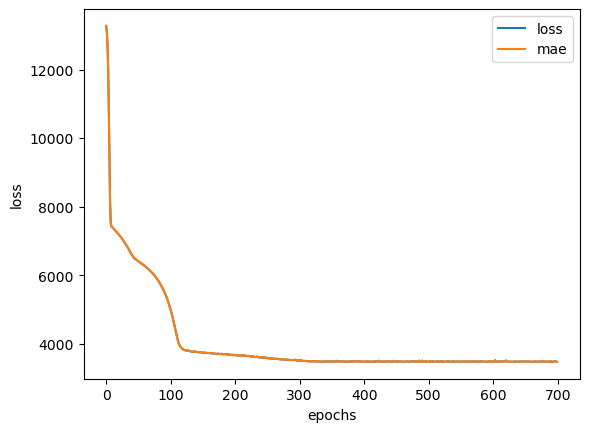

In [46]:
#plot history 
pd.DataFrame(history.history).plot()
plt.ylabel('loss')
plt.xlabel('epochs')
plt.show()


In [47]:
df=pd.read_csv('insurance.csv')

In [48]:
df

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520
...,...,...,...,...,...,...,...
1333,50,male,30.970,3,no,northwest,10600.54830
1334,18,female,31.920,0,no,northeast,2205.98080
1335,18,female,36.850,0,no,southeast,1629.83350
1336,21,female,25.800,0,no,southwest,2007.94500


In [51]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder


In [64]:
# Create column transformer (this will help us normalize/preprocess our data)
ct = make_column_transformer(
    (MinMaxScaler(), ["age", "bmi", "children"]), # get all values between 0 and 1
    (OneHotEncoder(handle_unknown="ignore"), ["sex", "smoker", "region"])
)

# Create X & y
X = df.drop("charges", axis=1)
y = df["charges"]

# Build our train and test sets (use random state to ensure same split as before)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit column transformer on the training data only (doing so on test data would result in data leakage)
ct.fit(X_train)

# Transform training and test data with normalization (MinMaxScalar) and one hot encoding (OneHotEncoder)
X_train_normal = ct.transform(X_train)
X_test_normal = ct.transform(X_test)

In [65]:
X_train_normal

array([[0.60869565, 0.10734463, 0.4       , ..., 1.        , 0.        ,
        0.        ],
       [0.63043478, 0.22491256, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.73913043, 0.23944041, 0.        , ..., 0.        , 1.        ,
        0.        ],
       ...,
       [0.86956522, 0.24791499, 0.        , ..., 0.        , 0.        ,
        0.        ],
       [0.41304348, 0.85122411, 0.4       , ..., 0.        , 0.        ,
        1.        ],
       [0.80434783, 0.37503363, 0.        , ..., 0.        , 0.        ,
        1.        ]])

In [67]:
X_train.loc[0]

age                19
sex            female
bmi              27.9
children            0
smoker            yes
region      southwest
Name: 0, dtype: object

In [78]:
tf.random.set_seed(42)
model_1=tf.keras.Sequential([tf.keras.layers.Dense(100),
                           tf.keras.layers.Dense(10),
                           tf.keras.layers.Dense(1)])
model_1.compile(loss=tf.keras.losses.mae,optimizer=tf.keras.optimizers.Adam(),
            metrics=['mae'])

In [79]:
model_1.fit(X_train_normal,y_train,epochs=100,verbose=2)

Epoch 1/100
34/34 - 1s - loss: 13342.6475 - mae: 13342.6475
Epoch 2/100
34/34 - 0s - loss: 13333.4785 - mae: 13333.4785
Epoch 3/100
34/34 - 0s - loss: 13312.0234 - mae: 13312.0234
Epoch 4/100
34/34 - 0s - loss: 13267.7930 - mae: 13267.7930
Epoch 5/100
34/34 - 0s - loss: 13189.5850 - mae: 13189.5850
Epoch 6/100
34/34 - 0s - loss: 13066.4502 - mae: 13066.4502
Epoch 7/100
34/34 - 0s - loss: 12888.1953 - mae: 12888.1953
Epoch 8/100
34/34 - 0s - loss: 12644.6523 - mae: 12644.6523
Epoch 9/100
34/34 - 0s - loss: 12325.5469 - mae: 12325.5469
Epoch 10/100
34/34 - 0s - loss: 11925.9658 - mae: 11925.9658
Epoch 11/100
34/34 - 0s - loss: 11454.3350 - mae: 11454.3350
Epoch 12/100
34/34 - 0s - loss: 10949.8086 - mae: 10949.8086
Epoch 13/100
34/34 - 0s - loss: 10448.9404 - mae: 10448.9404
Epoch 14/100
34/34 - 0s - loss: 9951.6250 - mae: 9951.6250
Epoch 15/100
34/34 - 0s - loss: 9482.7422 - mae: 9482.7422
Epoch 16/100
34/34 - 0s - loss: 9066.7461 - mae: 9066.7461
Epoch 17/100
34/34 - 0s - loss: 8721.98

In [80]:
model_1.evaluate(X_test_normal,y_test)

9/9 [==============================] - 0s 1ms/step - loss: 3438.7844 - mae: 3438.7844


[3438.784423828125, 3438.784423828125]